Number of valid images: 38914
Example image path: 17/10000217_1981-05-05_2009.jpg, Age: 27


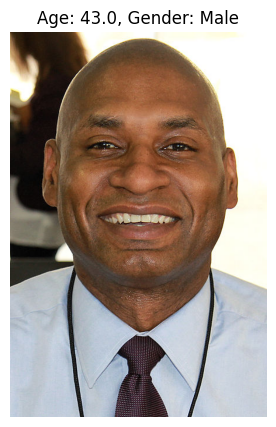

In [1]:
import scipy.io
import numpy as np
from datetime import datetime

# Load the .mat file
mat_file_path = "./wiki/wiki.mat"  # Replace with your .mat file path
data = scipy.io.loadmat(mat_file_path)

# Access the dataset metadata
meta_data = data['wiki']  # Change to 'imdb' if using the IMDb dataset

# Extract attributes
dob = meta_data['dob'][0][0].flatten()  # Date of birth
photo_taken = meta_data['photo_taken'][0][0].flatten()  # Year photo was taken
full_path = meta_data['full_path'][0][0].flatten()  # Image file paths
gender = meta_data['gender'][0][0].flatten()  # Gender
face_score = meta_data['face_score'][0][0].flatten()  # Face detection score
second_face_score = meta_data['second_face_score'][0][0].flatten()  # Second face score

# Convert byte strings to normal strings
full_path = [str(path[0]) for path in full_path]

# Calculate age (assuming photo taken in the middle of the year)
ages = np.array([
    datetime(photo_year, 7, 1).year - datetime.fromordinal(int(d)).year
    if not np.isnan(d) else np.nan
    for photo_year, d in zip(photo_taken, dob)
])

# Filter valid entries (e.g., face_score > threshold and age > 0)
valid_entries = (face_score > 1.0) & (np.isnan(second_face_score)) & (ages > 0)
filtered_paths = np.array(full_path)[valid_entries]
filtered_ages = ages[valid_entries]

# Example output
print(f"Number of valid images: {len(filtered_paths)}")
print(f"Example image path: {filtered_paths[0]}, Age: {filtered_ages[0]}")



import matplotlib.pyplot as plt
from PIL import Image
import os

def plot_image(dataset_root, full_paths, ages, index, gender=None):
    """
    Plot an image from the dataset with age and optional gender information.
    
    Parameters:
    - dataset_root (str): Root directory of the images.
    - full_paths (list): List of file paths relative to the dataset root.
    - ages (list or np.array): List of ages corresponding to the images.
    - index (int): Index of the image to display.
    - gender (list or np.array, optional): List of genders (0 for female, 1 for male, NaN if unknown).
    
    Returns:
    - None
    """
    if index < 0 or index >= len(full_paths):
        print("Index out of range.")
        return

    img_path = os.path.join(dataset_root, full_paths[index])
    age = ages[index]
    gender_str = "Unknown"
    if gender is not None and not np.isnan(gender[index]):
        gender_str = "Male" if gender[index] == 1 else "Female"

    try:
        # Load and display the image
        img = Image.open(img_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        title = f"Age: {age:.1f}"
        if gender is not None:
            title += f", Gender: {gender_str}"
        plt.title(title, fontsize=12)
        plt.show()
    except Exception as e:
        print(f"Could not load image: {img_path}")
        print(e)


# Example root directory (change this to your dataset's location)
dataset_root = "./wiki/"

# Plot the first valid image
plot_image(
    dataset_root=dataset_root,
    full_paths=filtered_paths,  # From earlier code
    ages=filtered_ages,        # From earlier code
    index=1000,                   # Index of the image to display
    gender=gender              # Optional, include gender if available
)
